/Users/premdoshi/Desktop/blockhouse/Project/scripts/generate_data.py:7: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  timestamps = pd.date_range(start='2025-01-01 09:30:00', periods=rows, freq='S')


OFI Data Columns: Index(['timestamp', 'stock', 'bid_price_1', 'bid_price_2', 'bid_price_3',
       'bid_price_4', 'bid_price_5', 'ask_price_1', 'ask_price_2',
       'ask_price_3', 'ask_price_4', 'ask_price_5', 'bid_size_1', 'bid_size_2',
       'bid_size_3', 'bid_size_4', 'bid_size_5', 'ask_size_1', 'ask_size_2',
       'ask_size_3', 'ask_size_4', 'ask_size_5', 'volume', 'price_change'],
      dtype='object')
Trade Data Columns: Index(['timestamp', 'stock', 'volume', 'price_change'], dtype='object')
OFI Data Columns after calculation: Index(['timestamp', 'stock', 'bid_price_1', 'bid_price_2', 'bid_price_3',
       'bid_price_4', 'bid_price_5', 'ask_price_1', 'ask_price_2',
       'ask_price_3', 'ask_price_4', 'ask_price_5', 'bid_size_1', 'bid_size_2',
       'bid_size_3', 'bid_size_4', 'bid_size_5', 'ask_size_1', 'ask_size_2',
       'ask_size_3', 'ask_size_4', 'ask_size_5', 'volume', 'price_change',
       'OFI_1', 'OFI_2', 'OFI_3', 'OFI_4', 'OFI_5'],
      dtype='object')
Trade Data

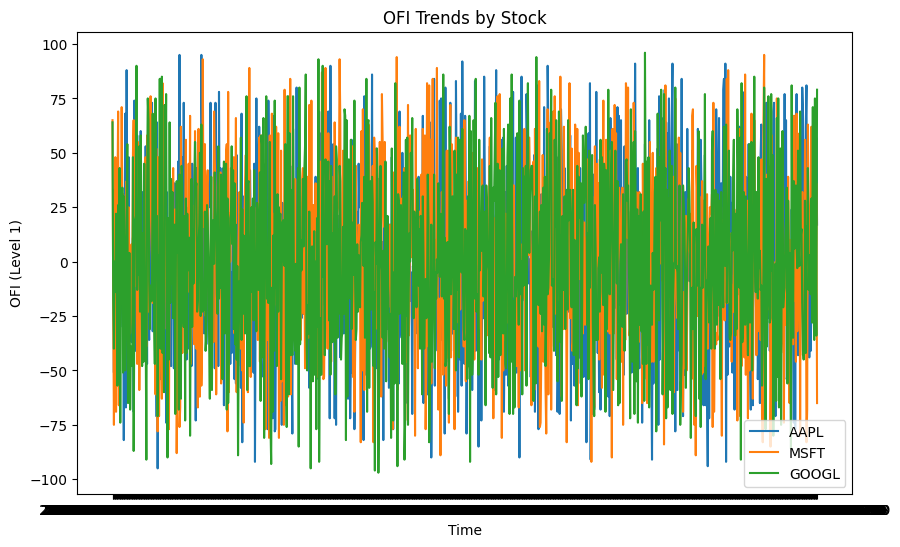

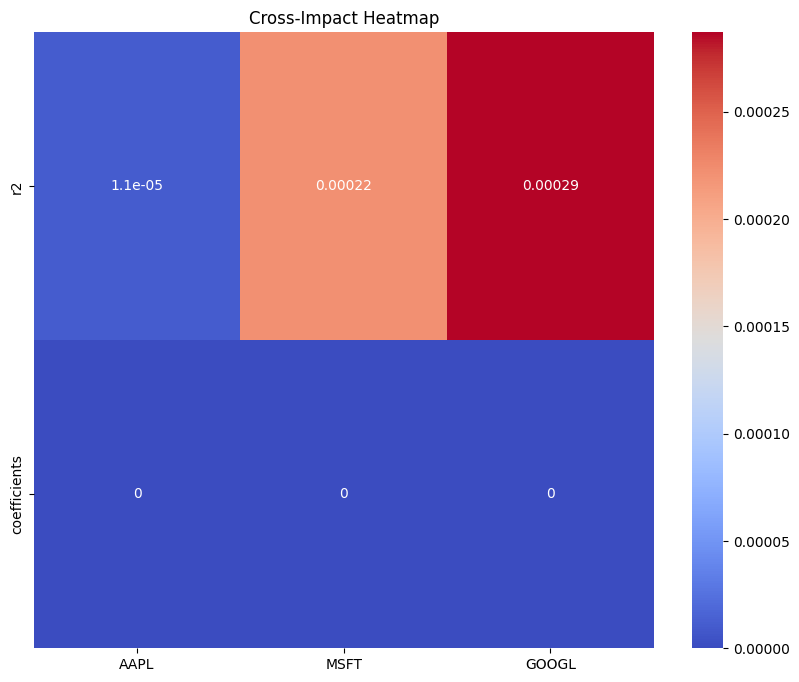

In [15]:
import pandas as pd
import sys
import os
import numpy as np

# Change the current working directory to the root project folder
os.chdir('/Users/premdoshi/Desktop/blockhouse/Project')

# Add the scripts directory to the system path for module imports
sys.path.append(os.path.abspath('scripts'))

# Now import your modules
from scripts.generate_data import save_synthetic_data
from scripts.preprocess_data import preprocess_data
from scripts.ofi_calculation import calculate_ofi
from scripts.cross_impact_analysis import cross_impact_analysis
from scripts.visualization import plot_ofi_trends, plot_cross_impact_heatmap

# Step 1: Save synthetic data
save_synthetic_data()

# Step 2: Preprocess data
order_book, trade_data = preprocess_data('data/order_book.csv', 'data/trade_data.csv')

# Step 3: Calculate OFI metrics
ofi_data = calculate_ofi(order_book)
ofi_data.to_csv('data/ofi_data.csv', index=False)

# Step 4: Perform cross-impact analysis
results = cross_impact_analysis(ofi_data, trade_data)
print("Cross-impact analysis results:")
print(results)

# Check if results are a dictionary and print its keys
if isinstance(results, dict):
    print("Results are a dictionary with keys:")
    print(results.keys())
    
    # Convert dictionary to a DataFrame for visualization
    results_df = pd.DataFrame.from_dict(results)
    
    # Ensure the DataFrame contains numeric data for heatmap
    results_df = results_df.apply(pd.to_numeric, errors='coerce')  # Convert all to numeric, coercing errors to NaN
    results_df.fillna(0, inplace=True)  # Replace NaN with 0 or another strategy if necessary
    
    print("Converted cross-impact analysis matrix:")
    print(results_df)

    # Step 5: Plot visualizations
    plot_ofi_trends(ofi_data)
    plot_cross_impact_heatmap(results_df)  # Pass the cleaned DataFrame to the heatmap function
else:
    print("Error: Expected a dictionary from cross_impact_analysis.")
